In [1]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
'NODE_MAJOR' is not recognized as an internal or external command,
operable program or batch file.
Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
'node' is not recognized as an internal or external command,
operable pro

In [2]:
!pip install Sastrawi -qqq
!pip install nltk -qqq
!pip install wordcloud -qqq
!pip install transformers -qqq
!pip install networkx -qqq

In [1]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import pipeline
from sklearn.metrics import silhouette_score
from operator import itemgetter


c:\Users\MSI_PC\anaconda3\envs\proyek_nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Twitter auth token
twitter_auth_token = 'cfd3e20e7300f4332d7f7c6a089fcdd1a7e0b434' 

In [3]:
# Crawl tweet
filename = 'menteri_keuangan.csv'
search_keyword = 'menteri keuangan until:2025-09-27 since:2025-09-24 lang:id' # topiknya (ngasal dulu)
limit = 500

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: menteri keuangan until:2025-09-27 since:2025-09-24 lang:id

Created new directory: \\?\e:\Tugas Semester 5\Datmin 2\TM7\tweets-data


Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\menteri_keuangan.csv
Total tweets saved: 20

-- Scrolling... (1) (2) (3) (4) (5) (6)

Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\menteri_keuangan.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\menteri_keuangan.csv
Total tweets saved: 60

-- Scrolling... (1)

Your tweets saved t

npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
npm notice
npm notice New major version of npm available! 10.9.3 -> 11.6.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.6.1
npm notice To updat

In [4]:
import pandas as pd

file_path = f"tweets-data/{'menteri_keuangan.csv'}"
df1= pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df1)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971638499188396160,Fri Sep 26 18:10:24 +0000 2025,0,LokaModal Menteri Maman Serukan UMKM Disiplin ...,1971638499188396160,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197163849918839...,823779030767833088,NaN
1,1971620784763555946,Fri Sep 26 17:00:00 +0000 2025,0,Menteri Keuangan Purbaya Yudhi Sadewa memastik...,1971620784763555946,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197162078476355...,1173853316511485952,NaN
2,1971620169756836255,Fri Sep 26 16:57:34 +0000 2025,0,https://t.co/lUEPibZmMY JurnalPatroliNews Jaka...,1971620169756836255,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197162016975683...,1507307226058223618,NaN
3,1971619384398696626,Fri Sep 26 16:54:26 +0000 2025,1,Menteri Keuangan Purbaya Yudhi Sadewa memutusk...,1971619384398696626,NaN,NaN,in,NaN,0,2,0,https://x.com/undefined/status/197161938439869...,137282550,NaN
4,1971604688442462416,Fri Sep 26 15:56:03 +0000 2025,0,Bukan aunty rich tapi kalo ponakan ngomong mau...,1971604688442462416,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197160468844246...,125203290,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1970419394133271009,Wed Sep 24 00:54:33 +0000 2025,1,@_blacknerd_ @KemenkeuRI Predikat Srimul mente...,1970653043378340219,NaN,_blacknerd_,in,NaN,0,0,0,https://x.com/undefined/status/197065304337834...,121425273,NaN
216,1970354756775534832,Wed Sep 24 00:51:53 +0000 2025,1,@hnirankara Ini penjelasan dari menteri keuang...,1970652374399320500,NaN,hnirankara,in,NaN,0,0,0,https://x.com/undefined/status/197065237439932...,1541718298190290946,NaN
217,1970650049525985652,Wed Sep 24 00:43:17 +0000 2025,1,@Kapitein_1825 Sepertinya suasana memang lebih...,1970650208683086245,NaN,Kapitein_1825,in,NaN,0,0,1,https://x.com/undefined/status/197065020868308...,1720665183188922368,NaN
218,1970645355688501259,Wed Sep 24 00:40:12 +0000 2025,0,@satanipz @txtdrimedia Ya berita itu benar ber...,1970649434225823899,NaN,satanipz,in,NaN,0,0,0,https://x.com/undefined/status/197064943422582...,1720665183188922368,NaN


In [5]:
# Crawl tweet
filename = 'purbaya.csv'
search_keyword = 'purbaya until:2025-09-27 since:2025-09-24 lang:id' # topiknya (ngasal dulu)
limit = 100

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: purbaya until:2025-09-27 since:2025-09-24 lang:id

 (2)

Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\purbaya.csv
Total tweets saved: 20

-- Scrolling... (1) (2)

Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\purbaya.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\purbaya.csv
Total tweets saved: 60

-- Scrolling... (1)

Your tweets saved to: e:\Tugas Semester 5\Datmin 2\TM7\tweets-data\purbaya.csv
Total tweets saved: 80

-- Scrolling... (1)

Your tweets sav

In [6]:
file_path = f"tweets-data/{'purbaya.csv'}"
df2 = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df2)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971725755626541062,Fri Sep 26 23:57:07 +0000 2025,2,Siapa? Kan Purbaya sendiri yg bilang: pelaku d...,1971725755626541062,NaN,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172575562654...,86570123,NaN
1,1971534681159201012,Fri Sep 26 23:37:22 +0000 2025,4,@CNNIndonesia Harus ada time frame sampai akhi...,1971720782998130801,NaN,CNNIndonesia,in,NaN,0,2,1,https://x.com/undefined/status/197172078299813...,363380931,NaN
2,1971718982899323299,Fri Sep 26 23:30:12 +0000 2025,1,Himpunan Bank Milik Negara (Himbara) kompak me...,1971718982899323299,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197171898289932...,79130206,NaN
3,1971498534165008790,Fri Sep 26 22:32:12 +0000 2025,0,@sukatomoro Menteri Purbaya kah?,1971704382774562996,NaN,sukatomoro,in,NaN,0,1,0,https://x.com/undefined/status/197170438277456...,2781902126,NaN
4,1971692757170508223,Fri Sep 26 21:46:00 +0000 2025,0,Dapatkan bonus 10.000 saldo pas download apk S...,1971692757170508223,https://pbs.twimg.com/media/G1wkAnga0AA9ZOt.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197169275717050...,1884735513976004608,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1971539041532489987,Fri Sep 26 11:35:11 +0000 2025,0,5. Pesohor Tukul Arwana pernah berkata bahwa s...,1971539041532489987,https://pbs.twimg.com/media/G1xQT2XagAASRYV.jpg,NaN,in,NaN,1,0,0,https://x.com/undefined/status/197153904153248...,218477659,NaN
114,1971538961853272193,Fri Sep 26 11:34:52 +0000 2025,1,Purbaya Tunda Pungutan PPh Pedagang Online di ...,1971538961853272193,NaN,NaN,in,NaN,1,1,1,https://x.com/undefined/status/197153896185327...,847372542830444544,NaN
115,1971538573964046715,Fri Sep 26 11:33:20 +0000 2025,3,Wkwkkw cuci tangan. Bukan instruksi tapi kok k...,1971538573964046715,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197153857396404...,6689892,NaN
116,1971537987684245516,Fri Sep 26 11:31:00 +0000 2025,1,Bonus 10.000 saldo kalaau install apk Shopeepa...,1971537987684245516,https://pbs.twimg.com/media/G1xCFoBbQAAetY0.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197153798768424...,1884735513976004608,NaN


In [7]:
# Menyatukan df1 dan df2
combined_df = pd.concat([df1, df2], ignore_index=True)

# Menghapus data duplicate apabila data df1 dan df2 ada yang sama
unique_df = combined_df.drop_duplicates()

# Menyimpan data final ke data.csv
unique_df.to_csv('data.csv', index=False)


In [8]:
data = pd.read_csv('data.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971638499188396160,Fri Sep 26 18:10:24 +0000 2025,0,LokaModal Menteri Maman Serukan UMKM Disiplin ...,1971638499188396160,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197163849918839...,823779030767833088,NaN
1,1971620784763555946,Fri Sep 26 17:00:00 +0000 2025,0,Menteri Keuangan Purbaya Yudhi Sadewa memastik...,1971620784763555946,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197162078476355...,1173853316511485952,NaN
2,1971620169756836255,Fri Sep 26 16:57:34 +0000 2025,0,https://t.co/lUEPibZmMY JurnalPatroliNews Jaka...,1971620169756836255,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197162016975683...,1507307226058223618,NaN
3,1971619384398696626,Fri Sep 26 16:54:26 +0000 2025,1,Menteri Keuangan Purbaya Yudhi Sadewa memutusk...,1971619384398696626,NaN,NaN,in,NaN,0,2,0,https://x.com/undefined/status/197161938439869...,137282550,NaN
4,1971604688442462416,Fri Sep 26 15:56:03 +0000 2025,0,Bukan aunty rich tapi kalo ponakan ngomong mau...,1971604688442462416,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197160468844246...,125203290,NaN


In [9]:
# Cleaning text
def clean_text(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'@[^\s]+', '', text)  # Menghapus mentions
  text = re.sub(r'[^\w\s]', '', text)  # Menghapus punctuation
  text = re.sub(r'\d+', '', text)  # Menghapus angka
  return text

data['full_text_cleaned'] = data['full_text'].apply(clean_text)

data['full_text_cleaned']


0      lokamodal menteri maman serukan umkm disiplin ...
1      menteri keuangan purbaya yudhi sadewa memastik...
2      httpstcoluepibzmmy jurnalpatrolinews jakarta m...
3      menteri keuangan purbaya yudhi sadewa memutusk...
4      bukan aunty rich tapi kalo ponakan ngomong mau...
                             ...                        
318     pesohor tukul arwana pernah berkata bahwa san...
319    purbaya tunda pungutan pph pedagang online di ...
320    wkwkkw cuci tangan bukan instruksi tapi kok ko...
321    bonus  saldo kalaau install apk shopeepay cara...
322    menteri keuangan purbaya yudhi sadewa memutusk...
Name: full_text_cleaned, Length: 323, dtype: object

In [10]:
# Menyatukan konten tweet
combined_text = ' '.join(data['full_text_cleaned'].tolist())

## tokenize

In [11]:
#Tokenize
nltk.download('punkt')
tokens = word_tokenize(combined_text)
print(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['lokamodal', 'menteri', 'maman', 'serukan', 'umkm', 'disiplin', 'atur', 'keuangan', 'httpstcoyhwbwzyd', 'beritaterkini', 'beritaviral', 'kabarterbaru', 'klikwarta', 'news', 'beritanasional', 'menteri', 'keuangan', 'purbaya', 'yudhi', 'sadewa', 'memastikan', 'rencana', 'kenaikan', 'tarif', 'cukai', 'hasil', 'tembakau', 'pada', 'batal', 'dilaksanakan', 'keputusan', 'ini', 'diambil', 'setelah', 'pemerintah', 'berdiskusi', 'dengan', 'pelaku', 'industri', 'rokok', 'besar', 'dalam', 'negeri', 'httpstcojmffhki', 'httpstcoluepibzmmy', 'jurnalpatrolinews', 'jakarta', 'menteri', 'keuangan', 'purbaya', 'yudhi', 'sadewa', 'memastikan', 'bahwa', 'tarif', 'cukai', 'rokok', 'tidak', 'akan', 'dinaikkan', 'pada', 'tahun', 'pernyataan', 'itu', 'disampaikan', 'setelah', 'pertemuan', 'menteri', 'keuangan', 'purbaya', 'yudhi', 'sadewa', 'memutuskan', 'menunda', 'sementara', 'kebijakan', 'pajak', 'ecommerce', 'terhadap', 'penjual', 'sampai', 'saat', 'ini', 'belum', 'ada', 'marketplace', 'yang', 'ditunjuk',

## stemming

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed_tokens = [stemmer.stem(token) for token in tokens]
print(stemmed_tokens)


['lokamodal', 'menteri', 'maman', 'seru', 'umkm', 'disiplin', 'atur', 'uang', 'httpstcoyhwbwzyd', 'beritaterkini', 'beritaviral', 'kabarterbaru', 'klikwarta', 'news', 'beritanasional', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'pasti', 'rencana', 'naik', 'tarif', 'cukai', 'hasil', 'tembakau', 'pada', 'batal', 'laksana', 'putus', 'ini', 'ambil', 'telah', 'perintah', 'diskus', 'dengan', 'laku', 'industri', 'rokok', 'besar', 'dalam', 'negeri', 'httpstcojmffhki', 'httpstcoluepibzmmy', 'jurnalpatrolinews', 'jakarta', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'pasti', 'bahwa', 'tarif', 'cukai', 'rokok', 'tidak', 'akan', 'naik', 'pada', 'tahun', 'nyata', 'itu', 'sampai', 'telah', 'temu', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'putus', 'tunda', 'sementara', 'bijak', 'pajak', 'ecommerce', 'hadap', 'jual', 'sampai', 'saat', 'ini', 'belum', 'ada', 'marketplace', 'yang', 'tunjuk', 'bagai', 'mungut', 'pajak', 'hasil', 'pph', 'pasal', 'besar', 'atas', 'transaksi', 'jual', 'ba

## stopword

In [13]:
# Stopwords dengan sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stemmed_text = ' '.join(stemmed_tokens)
stopped_text = stopword.remove(stemmed_text)

# Membuat token stopped token
stopped_tokens = word_tokenize(stopped_text)

print(stopped_tokens)

['lokamodal', 'menteri', 'maman', 'seru', 'umkm', 'disiplin', 'atur', 'uang', 'httpstcoyhwbwzyd', 'beritaterkini', 'beritaviral', 'kabarterbaru', 'klikwarta', 'news', 'beritanasional', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'rencana', 'naik', 'tarif', 'cukai', 'hasil', 'tembakau', 'batal', 'laksana', 'putus', 'ambil', 'perintah', 'diskus', 'laku', 'industri', 'rokok', 'besar', 'negeri', 'httpstcojmffhki', 'httpstcoluepibzmmy', 'jurnalpatrolinews', 'jakarta', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'tarif', 'cukai', 'rokok', 'naik', 'tahun', 'nyata', 'temu', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'putus', 'tunda', 'bijak', 'pajak', 'ecommerce', 'hadap', 'jual', 'marketplace', 'tunjuk', 'bagai', 'mungut', 'pajak', 'hasil', 'pph', 'pasal', 'besar', 'atas', 'transaksi', 'jual', 'barang', 'merchant', 'bukan', 'aunty', 'rich', 'kalo', 'ponakan', 'ngomong', 'mau', 'beli', 'motor', 'bayar', 'nyicil', 'me', 'mau', 'kapan', 'cicilin', 'iphone', 'dong', 'ti', 'me', 's

## hapus kata spesifik

In [14]:
final_tokens = [token for token in stopped_tokens if token not in ['yg', 'dong', 'kayak', 'aja', 'nya','kan']]
print(final_tokens)

['lokamodal', 'menteri', 'maman', 'seru', 'umkm', 'disiplin', 'atur', 'uang', 'httpstcoyhwbwzyd', 'beritaterkini', 'beritaviral', 'kabarterbaru', 'klikwarta', 'news', 'beritanasional', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'rencana', 'naik', 'tarif', 'cukai', 'hasil', 'tembakau', 'batal', 'laksana', 'putus', 'ambil', 'perintah', 'diskus', 'laku', 'industri', 'rokok', 'besar', 'negeri', 'httpstcojmffhki', 'httpstcoluepibzmmy', 'jurnalpatrolinews', 'jakarta', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'tarif', 'cukai', 'rokok', 'naik', 'tahun', 'nyata', 'temu', 'menteri', 'uang', 'purbaya', 'yudhi', 'sadewa', 'putus', 'tunda', 'bijak', 'pajak', 'ecommerce', 'hadap', 'jual', 'marketplace', 'tunjuk', 'bagai', 'mungut', 'pajak', 'hasil', 'pph', 'pasal', 'besar', 'atas', 'transaksi', 'jual', 'barang', 'merchant', 'bukan', 'aunty', 'rich', 'kalo', 'ponakan', 'ngomong', 'mau', 'beli', 'motor', 'bayar', 'nyicil', 'me', 'mau', 'kapan', 'cicilin', 'iphone', 'ti', 'me', 'sekali', 

## freqdist

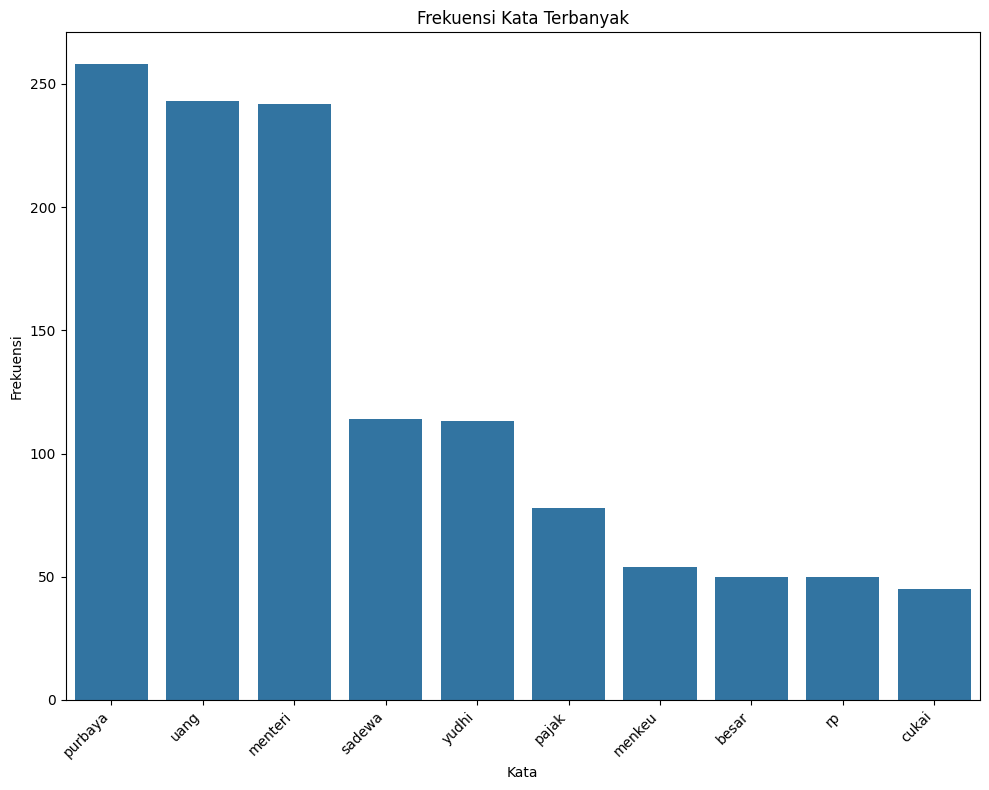

In [15]:
# Menghitung frekuensi kata
fdist = FreqDist(final_tokens)

# Mengambil 10 kata terbanyak
most_common_words = fdist.most_common(10)

# Membuat dataframe dari list tuple
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Membuat bar plot dengan seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_freq)
plt.title('Frekuensi Kata Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


## wordcloud

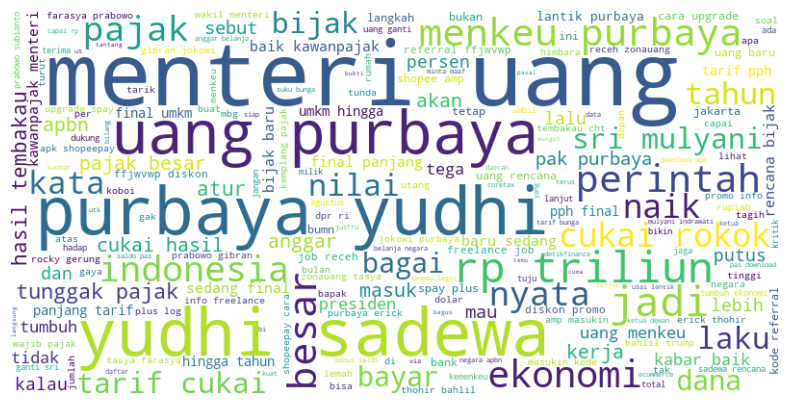

In [16]:
# Menggabungkan token menjadi teks
text = " ".join(final_tokens)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## clustering

In [17]:
# Menggabungkan token menjadi teks
text_for_clustering = final_tokens

# Membuat TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transformasi pada teks
tfidf_matrix = vectorizer.fit_transform(text_for_clustering)

# Menentukan jumlah cluster
num_clusters = 2

# Membuat model KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan clustering
kmeans.fit(tfidf_matrix)

# Mendapatkan label cluster untuk setiap dokumen
cluster_labels = kmeans.labels_

# Menampilkan hasil clustering
for i, label in enumerate(cluster_labels):
  print(f"Teks {i+1} termasuk dalam cluster {label}")

Teks 1 termasuk dalam cluster 0
Teks 2 termasuk dalam cluster 0
Teks 3 termasuk dalam cluster 0
Teks 4 termasuk dalam cluster 0
Teks 5 termasuk dalam cluster 0
Teks 6 termasuk dalam cluster 0
Teks 7 termasuk dalam cluster 0
Teks 8 termasuk dalam cluster 0
Teks 9 termasuk dalam cluster 0
Teks 10 termasuk dalam cluster 0
Teks 11 termasuk dalam cluster 0
Teks 12 termasuk dalam cluster 0
Teks 13 termasuk dalam cluster 0
Teks 14 termasuk dalam cluster 0
Teks 15 termasuk dalam cluster 0
Teks 16 termasuk dalam cluster 0
Teks 17 termasuk dalam cluster 0
Teks 18 termasuk dalam cluster 1
Teks 19 termasuk dalam cluster 0
Teks 20 termasuk dalam cluster 0
Teks 21 termasuk dalam cluster 0
Teks 22 termasuk dalam cluster 0
Teks 23 termasuk dalam cluster 0
Teks 24 termasuk dalam cluster 0
Teks 25 termasuk dalam cluster 0
Teks 26 termasuk dalam cluster 0
Teks 27 termasuk dalam cluster 0
Teks 28 termasuk dalam cluster 0
Teks 29 termasuk dalam cluster 0
Teks 30 termasuk dalam cluster 0
Teks 31 termasuk da

In [18]:
# Menampilkan jumlah data per cluster

cluster_counts = pd.Series(cluster_labels).value_counts()

print(f"Total number of data points: {len(cluster_labels)}")
print(f"Total number of clusters: {len(cluster_counts)}")
print("\nData per cluster:")
print(cluster_counts)


Total number of data points: 7115
Total number of clusters: 2

Data per cluster:
0    6857
1     258
Name: count, dtype: int64


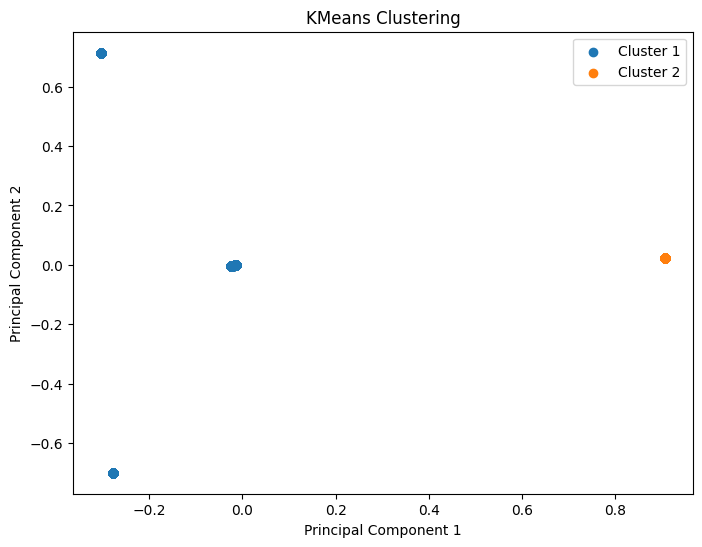

In [19]:
# Menampilkan hasil cluster dengan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
  cluster_data = reduced_data[cluster_labels == i]
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


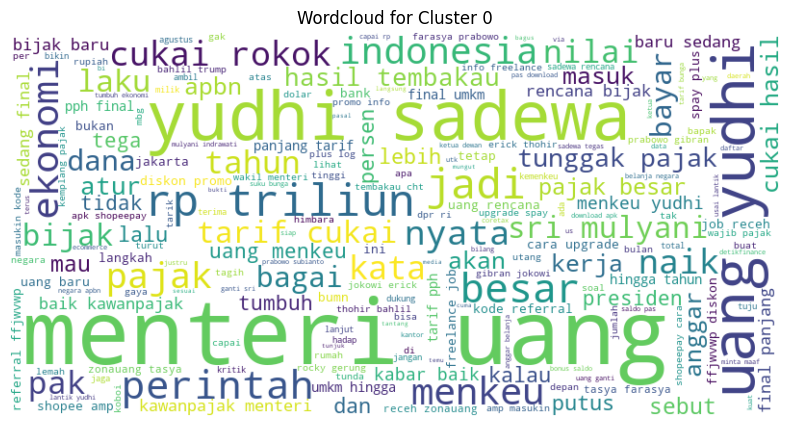

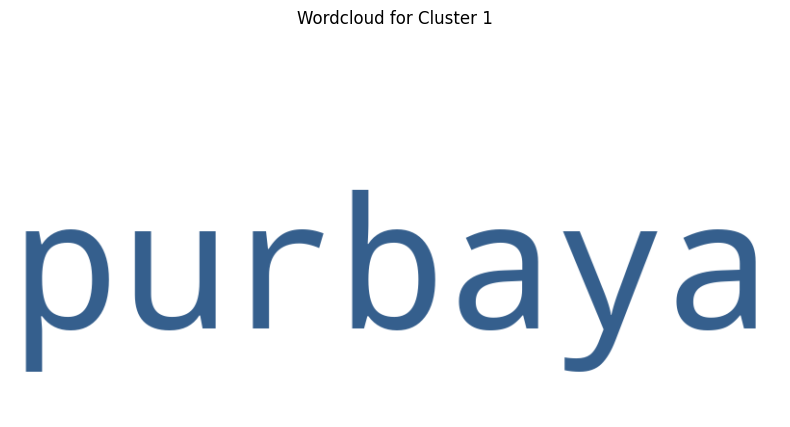

In [20]:
# Wordcloud per cluster

for cluster_num in range(num_clusters):
  cluster_tokens = [token for i, token in enumerate(final_tokens) if cluster_labels[i] == cluster_num]
  cluster_text = " ".join(cluster_tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Wordcloud for Cluster {cluster_num}')
  plt.axis("off")
  plt.show()


In [21]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.041407534270283604


### jelek bgt ygy. soalnya data text tersebut emang gk cocok untuk clustering dan hanya punya 1 cluster aj

## sentiment analysis

In [23]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00


In [24]:
# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Perform sentiment analysis
data['sentiment'] = data['full_text_cleaned'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if x else 'Neutral')

# Print hasil sentiment
print(data[['full_text_cleaned', 'sentiment']])



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cpu


                                     full_text_cleaned sentiment
0    lokamodal menteri maman serukan umkm disiplin ...  NEGATIVE
1    menteri keuangan purbaya yudhi sadewa memastik...  NEGATIVE
2    httpstcoluepibzmmy jurnalpatrolinews jakarta m...  NEGATIVE
3    menteri keuangan purbaya yudhi sadewa memutusk...  NEGATIVE
4    bukan aunty rich tapi kalo ponakan ngomong mau...  NEGATIVE
..                                                 ...       ...
318   pesohor tukul arwana pernah berkata bahwa san...  NEGATIVE
319  purbaya tunda pungutan pph pedagang online di ...  NEGATIVE
320  wkwkkw cuci tangan bukan instruksi tapi kok ko...  NEGATIVE
321  bonus  saldo kalaau install apk shopeepay cara...  NEGATIVE
322  menteri keuangan purbaya yudhi sadewa memutusk...  NEGATIVE

[323 rows x 2 columns]


In [25]:
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_cleaned,sentiment
0,1971638499188396160,Fri Sep 26 18:10:24 +0000 2025,0,LokaModal Menteri Maman Serukan UMKM Disiplin ...,1971638499188396160,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197163849918839...,823779030767833088,NaN,lokamodal menteri maman serukan umkm disiplin ...,NEGATIVE
1,1971620784763555946,Fri Sep 26 17:00:00 +0000 2025,0,Menteri Keuangan Purbaya Yudhi Sadewa memastik...,1971620784763555946,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197162078476355...,1173853316511485952,NaN,menteri keuangan purbaya yudhi sadewa memastik...,NEGATIVE
2,1971620169756836255,Fri Sep 26 16:57:34 +0000 2025,0,https://t.co/lUEPibZmMY JurnalPatroliNews Jaka...,1971620169756836255,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197162016975683...,1507307226058223618,NaN,httpstcoluepibzmmy jurnalpatrolinews jakarta m...,NEGATIVE
3,1971619384398696626,Fri Sep 26 16:54:26 +0000 2025,1,Menteri Keuangan Purbaya Yudhi Sadewa memutusk...,1971619384398696626,NaN,NaN,in,NaN,0,2,0,https://x.com/undefined/status/197161938439869...,137282550,NaN,menteri keuangan purbaya yudhi sadewa memutusk...,NEGATIVE
4,1971604688442462416,Fri Sep 26 15:56:03 +0000 2025,0,Bukan aunty rich tapi kalo ponakan ngomong mau...,1971604688442462416,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197160468844246...,125203290,NaN,bukan aunty rich tapi kalo ponakan ngomong mau...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1971539041532489987,Fri Sep 26 11:35:11 +0000 2025,0,5. Pesohor Tukul Arwana pernah berkata bahwa s...,1971539041532489987,https://pbs.twimg.com/media/G1xQT2XagAASRYV.jpg,NaN,in,NaN,1,0,0,https://x.com/undefined/status/197153904153248...,218477659,NaN,pesohor tukul arwana pernah berkata bahwa san...,NEGATIVE
319,1971538961853272193,Fri Sep 26 11:34:52 +0000 2025,1,Purbaya Tunda Pungutan PPh Pedagang Online di ...,1971538961853272193,NaN,NaN,in,NaN,1,1,1,https://x.com/undefined/status/197153896185327...,847372542830444544,NaN,purbaya tunda pungutan pph pedagang online di ...,NEGATIVE
320,1971538573964046715,Fri Sep 26 11:33:20 +0000 2025,3,Wkwkkw cuci tangan. Bukan instruksi tapi kok k...,1971538573964046715,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197153857396404...,6689892,NaN,wkwkkw cuci tangan bukan instruksi tapi kok ko...,NEGATIVE
321,1971537987684245516,Fri Sep 26 11:31:00 +0000 2025,1,Bonus 10.000 saldo kalaau install apk Shopeepa...,1971537987684245516,https://pbs.twimg.com/media/G1xCFoBbQAAetY0.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197153798768424...,1884735513976004608,NaN,bonus saldo kalaau install apk shopeepay cara...,NEGATIVE


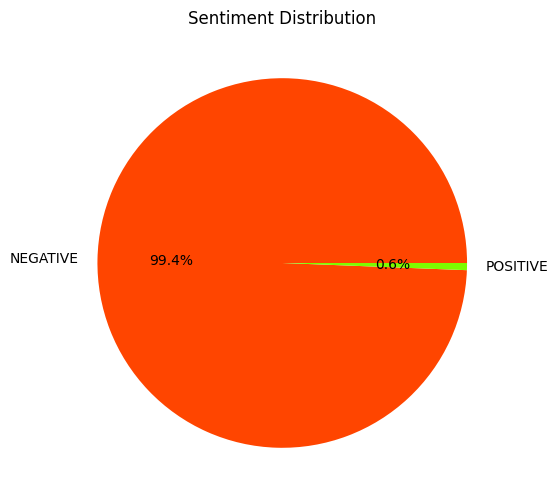

In [26]:
# Menghitung sentimet
sentiment_counts = data['sentiment'].value_counts()

# Membuat Piechart sentiment
plt.figure(figsize=(8, 6))
plt.pie(x=sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['orangered', 'lawngreen'])
plt.title('Sentiment Distribution')
plt.show()


## mayoritas negatif

In [27]:
# Tweet dengan sentiment positive
positive_tweets = data[data['sentiment'] == 'POSITIVE']
positive_tweets


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_cleaned,sentiment
223,1971498534165008790,Fri Sep 26 22:32:12 +0000 2025,0,@sukatomoro Menteri Purbaya kah?,1971704382774562996,NaN,sukatomoro,in,NaN,0,1,0,https://x.com/undefined/status/197170438277456...,2781902126,NaN,menteri purbaya kah,POSITIVE
263,1971585694327050634,Fri Sep 26 14:40:34 +0000 2025,0,Purbaya vs Rocky Gerung,1971585694327050634,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197158569432705...,62434920,NaN,purbaya vs rocky gerung,POSITIVE


## social network analysis

In [28]:
# Initialize a directed graph
G_mention = nx.DiGraph()

# Loop through each row in the DataFrame
for r in data.iterrows():
    author = r[1]['username']
    author = f'@{author}'
    text = r[1]['full_text']

    try:
        # Convert 'created_at' column to datetime
        timestamp = pd.to_datetime(r[1]['created_at'])
    except:
        # If timestamp parsing fails, skip this row
        continue

    # Use regular expressions to extract mentions
    mentions = set(re.findall(r"@(\w+)", text))

    # Add the users if there are any mentioned in the text
    if len(mentions) > 0:
        for u in mentions:
            u = f'@{u}'
            G_mention.add_edge(author, u, Timestamp=timestamp)


In [29]:
# Centrality measures
graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))


print("centrality measures:", graph_centrality)
print("closeness centrality:", graph_closeness)
print("betweenness centrality:", graph_betweenness)
print("max degree:", max_de)
print("max closeness:", max_clo)
print("max betweenness:", max_bet)


centrality measures: {'@nan': 1.0, '@PDI_Perjuangan': 0.01282051282051282, '@Gerindra': 0.01282051282051282, '@KemenkeuRI': 0.01282051282051282, '@bumn_idn': 0.01282051282051282, '@danantaraIDN': 0.01282051282051282, '@DPR_RI': 0.01282051282051282, '@KemensetnegRI': 0.01282051282051282, '@tempodotco': 0.01282051282051282, '@DS_yantie': 0.01282051282051282, '@OnedhyJoe': 0.01282051282051282, '@sarah_pndjtn': 0.01282051282051282, '@BigAlphaID': 0.01282051282051282, '@WarezHimawan': 0.01282051282051282, '@detik_properti': 0.01282051282051282, '@EdoJk13': 0.01282051282051282, '@GNFI': 0.01282051282051282, '@Verraagustian_': 0.01282051282051282, '@Metro_TV': 0.01282051282051282, '@anyingpukimak': 0.01282051282051282, '@dhanggoren': 0.01282051282051282, '@uuncontrollably': 0.01282051282051282, '@Windhixxx': 0.01282051282051282, '@OposisiCerdas': 0.01282051282051282, '@syukrist': 0.01282051282051282, '@FaGtng': 0.01282051282051282, '@81HuiHui': 0.01282051282051282, '@tilehopper': 0.0128205128

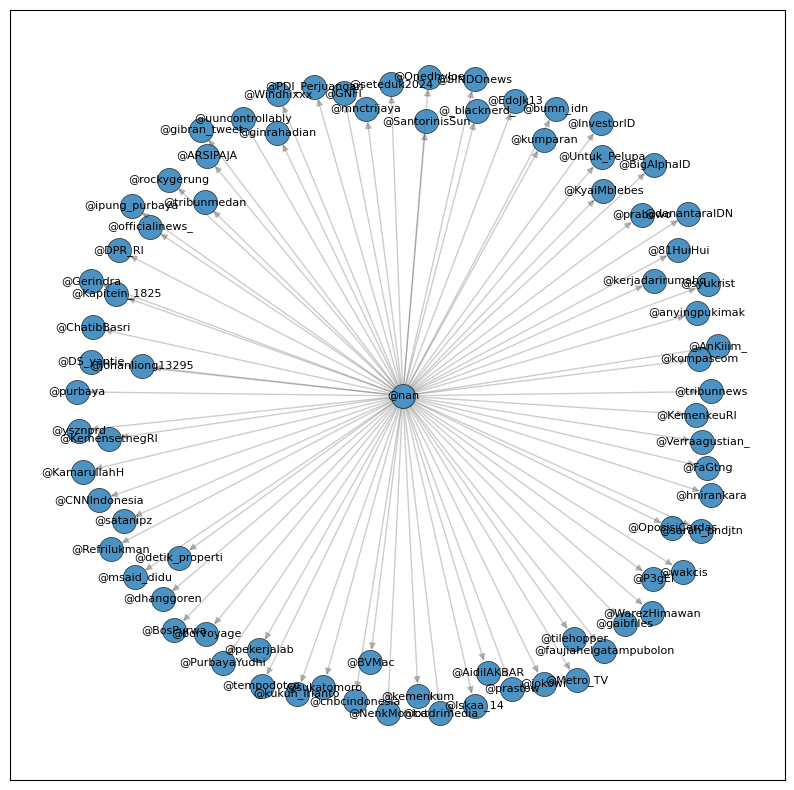

In [30]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt # Import the matplotlib library


# Assuming 'G_mention' from ipython-input-73-43702a354e30 is the intended graph
# Turn DataFrame into a graph
G = G_mention

# Specify layout for visualization
pos = nx.spring_layout(G)

# Create a plot with specified style and size
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

# Draw the nodes and set node properties
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')

# Draw the labels and edges
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

# Show the plot
plt.show()

In [31]:
# Analyze the most central nodes (users) in the network
degree_centrality = nx.degree_centrality(G_mention)
betweenness_centrality = nx.betweenness_centrality(G_mention)
closeness_centrality = nx.closeness_centrality(G_mention)

# Find the top 5 users with the highest degree centrality (most connections)
top_degree_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 5 users with the highest betweenness centrality (most bridging connections)
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 5 users with the highest closeness centrality (closest to other nodes)
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

print("Top 5 users by degree centrality:")
for node, centrality in top_degree_nodes:
    print(f"{node}: {centrality}")

print("\nTop 5 users by betweenness centrality:")
for node, centrality in top_betweenness_nodes:
    print(f"{node}: {centrality}")

print("\nTop 5 users by closeness centrality:")
for node, centrality in top_closeness_nodes:
    print(f"{node}: {centrality}")

# Identify potential discussion starters (users with early tweets)
data['created_at'] = pd.to_datetime(data['created_at'])
earliest_tweets = data.nsmallest(5, 'created_at')
discussion_starters = set(earliest_tweets['username'])

print("\nPotential discussion starters:")
for user in discussion_starters:
    print(user)


Top 5 users by degree centrality:
@nan: 1.0
@PDI_Perjuangan: 0.01282051282051282
@Gerindra: 0.01282051282051282
@KemenkeuRI: 0.01282051282051282
@bumn_idn: 0.01282051282051282

Top 5 users by betweenness centrality:
@nan: 0.0
@PDI_Perjuangan: 0.0
@Gerindra: 0.0
@KemenkeuRI: 0.0
@bumn_idn: 0.0

Top 5 users by closeness centrality:
@PDI_Perjuangan: 0.01282051282051282
@Gerindra: 0.01282051282051282
@KemenkeuRI: 0.01282051282051282
@bumn_idn: 0.01282051282051282
@danantaraIDN: 0.01282051282051282

Potential discussion starters:
nan
nan
nan
nan
nan


C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_24212\3223804752.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'])
